<a href="https://colab.research.google.com/github/aryapatel10/StockPredictor_RNN/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np

In [3]:
df = pd.read_csv('/content/stock market prediction123.csv')

In [4]:
df

,Timestamp,Open,High,Low,Close,Volume,Company Name
0,3/2/2010 9:01,8826.90,8856.95,8826.90,8839.80,6316783,Amazon
1,3/2/2010 9:02,8840.75,8853.90,8832.80,8852.30,6316784,Amazon
2,3/2/2010 9:03,8855.70,8855.70,8844.65,8846.65,6316785,Amazon
3,3/2/2010 9:04,8843.85,8850.70,8843.75,8846.70,6316786,Amazon
4,3/2/2010 9:05,8846.40,8846.40,8837.75,8841.60,6316787,Amazon
...,...,...,...,...,...,...,...
999,3/4/2010 12:40,9003.70,9008.15,9003.70,9008.15,6317782,myntra
1000,3/4/2010 12:41,9006.65,9010.10,9006.00,9009.10,6317783,myntra
1001,3/4/2010 12:42,9009.45,9010.65,9008.45,9010.60,6317784,myntra
1002,3/4/2010 12:43,9010.10,9010.95,9008.15,9010.90,6317785,myntra


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     1004 non-null   object 
 1   Open          1004 non-null   float64
 2   High          1004 non-null   float64
 3   Low           1004 non-null   float64
 4   Close         1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   Company Name  1004 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 55.0+ KB


In [6]:
Y_close = df['Close']
Y_open = df['Open']
X = df['Timestamp']

In [7]:
%matplotlib inline

In [8]:
Y_test_graph_open = Y_open[::150].to_numpy()[::-1]
Y_test_graph_close = Y_close[::150].to_numpy()[::-1]

In [9]:
X_test_graph = X[::150].to_numpy()[::-1]

In [10]:
y_open_float = np.array(list(map(float, Y_test_graph_open)))
y_close_float = np.array(list(map(float, Y_test_graph_close)))

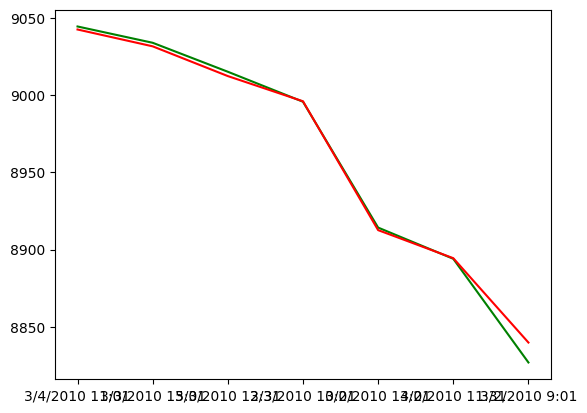

In [11]:
plt.plot(X_test_graph, y_open_float, color='green')
plt.plot(X_test_graph, y_close_float, color='red')
plt.savefig('chat.png')

In [12]:
plt.savefig('chat.png')

<Figure size 640x480 with 0 Axes>

In [13]:
X_test_graph


array(['3/4/2010 11:01', '3/3/2010 15:01', '3/3/2010 12:31',
       '3/3/2010 10:01', '3/2/2010 14:01', '3/2/2010 11:31',
       '3/2/2010 9:01'], dtype=object)

#Training the **RNN**

In [14]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
#Loading data from CSV
data = pd.read_csv('/content/stock market prediction123.csv')
data

,Timestamp,Open,High,Low,Close,Volume,Company Name
0,3/2/2010 9:01,8826.90,8856.95,8826.90,8839.80,6316783,Amazon
1,3/2/2010 9:02,8840.75,8853.90,8832.80,8852.30,6316784,Amazon
2,3/2/2010 9:03,8855.70,8855.70,8844.65,8846.65,6316785,Amazon
3,3/2/2010 9:04,8843.85,8850.70,8843.75,8846.70,6316786,Amazon
4,3/2/2010 9:05,8846.40,8846.40,8837.75,8841.60,6316787,Amazon
...,...,...,...,...,...,...,...
999,3/4/2010 12:40,9003.70,9008.15,9003.70,9008.15,6317782,myntra
1000,3/4/2010 12:41,9006.65,9010.10,9006.00,9009.10,6317783,myntra
1001,3/4/2010 12:42,9009.45,9010.65,9008.45,9010.60,6317784,myntra
1002,3/4/2010 12:43,9010.10,9010.95,9008.15,9010.90,6317785,myntra


In [16]:
data['close'] = data['Close'].astype(float)
data['open'] = data['Open'].astype(float)
data['high'] = data['High'].astype(float)
data['low'] = data['Low'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     1004 non-null   object 
 1   Open          1004 non-null   float64
 2   High          1004 non-null   float64
 3   Low           1004 non-null   float64
 4   Close         1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   Company Name  1004 non-null   object 
 7   close         1004 non-null   float64
 8   open          1004 non-null   float64
 9   high          1004 non-null   float64
 10  low           1004 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 86.4+ KB


In [17]:
#Data Transformation
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
# scaled_data = data[['open', 'high', 'low', 'close', 'volume']]
scaled_data

array([[0.00000000e+00, 6.19469027e-02, 0.00000000e+00, 1.25895377e-02,
        0.00000000e+00],
       [5.77926142e-02, 4.84513274e-02, 2.47587075e-02, 6.68547862e-02,
        9.97008973e-04],
       [1.20175256e-01, 5.64159292e-02, 7.44859421e-02, 4.23268939e-02,
        1.99401795e-03],
       ...,
       [7.61735865e-01, 7.42035398e-01, 7.61854805e-01, 7.54069894e-01,
        9.98005982e-01],
       [7.64448154e-01, 7.43362832e-01, 7.60595888e-01, 7.55372260e-01,
        9.99002991e-01],
       [7.65282704e-01, 7.44469027e-01, 7.51783466e-01, 7.39960929e-01,
        1.00000000e+00]])

In [18]:
#Function for creating time sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [19]:
#Model parameters
SEQ_LENGTH = 100
PREDICT_STEPS = 1

#Creating temporal sequences.
sequences = create_sequences(scaled_data, SEQ_LENGTH + PREDICT_STEPS)

In [20]:
len(sequences[0])


101


*101 is 100 values and 1 is the prediction.*





In [21]:
#Splitting into training and validation sets
X = sequences[:, :-PREDICT_STEPS]
y = sequences[:, -PREDICT_STEPS:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [22]:
print(X_train.size)

361000


In [23]:
#Converting data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).float()

In [24]:
print(X_train.size())
print(y_train.size())

print(X_val.size())
print(y_val.size())


y_train = y_train.squeeze(1)
y_val = y_val.squeeze(1)

print(y_train.size())
print(y_val.size())

torch.Size([722, 100, 5])
torch.Size([722, 1, 5])
torch.Size([181, 100, 5])
torch.Size([181, 1, 5])
torch.Size([722, 5])
torch.Size([181, 5])


In [25]:
#Creating an RNN model class
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [26]:
#Model initialization
input_size = 5 #Number of features in the input data (open, high, low, close, volume)
hidden_size = 100
# output_size = PREDICT_STEPS
model = SimpleRNN(input_size, hidden_size, 5)


In [27]:
#Defining the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
#Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/10], Loss: 0.3365350067615509
Epoch [2/10], Loss: 0.2834290564060211
Epoch [3/10], Loss: 0.2344929575920105
Epoch [4/10], Loss: 0.18766066431999207
Epoch [5/10], Loss: 0.14194728434085846
Epoch [6/10], Loss: 0.09754165261983871
Epoch [7/10], Loss: 0.05652359127998352
Epoch [8/10], Loss: 0.02497144788503647
Epoch [9/10], Loss: 0.015177893452346325
Epoch [10/10], Loss: 0.03492184355854988


In [29]:
def inverse_transform(scaled_data, scaler):

    return scaler.inverse_transform(scaled_data)


In [31]:
# Define a tolerance percentage (5% in this case)
tolerance_percentage = 0.05

# Function to calculate accuracy within tolerance
def calculate_accuracy(predictions, true_values, tolerance_percentage):
    # Calculate absolute percentage differences
    percentage_differences = np.abs((predictions - true_values) / true_values)
    correct_predictions = (percentage_differences <= tolerance_percentage).sum()
    total_predictions = len(true_values)

    # Calculate accuracy as a percentage
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Model validation (Place this after your model validation block)
model.eval()
with torch.no_grad():
    predictions = model(X_val)
    val_loss = criterion(predictions, y_val)

    # Transform predictions and true values back to original scale
    original_predictions = inverse_transform(predictions.detach().numpy(), scaler)
    true_stocks = inverse_transform(y_val.detach().numpy(), scaler)

    # Select close prices (or whichever target you're predicting)
    predicted_close = [stocks[-2] for stocks in original_predictions]
    true_close = [stocks[-2] for stocks in true_stocks]

    # Convert to NumPy arrays for easy calculation
    predicted_close = np.array(predicted_close)
    true_close = np.array(true_close)

    # Calculate accuracy within 5% tolerance
    accuracy = calculate_accuracy(predicted_close, true_close, tolerance_percentage)
    print(f'Validation Loss: {val_loss.item()}')
    print(f'Accuracy within {tolerance_percentage * 100}% tolerance: {accuracy:.2f}%')

Validation Loss: 0.024746252223849297
Accuracy within 5.0% tolerance: 100.00%


In [32]:
predictions.size()

torch.Size([181, 5])

In [33]:
y_val.size()

torch.Size([181, 5])

# Plot the closing price graphs according to the model and the actual data.

In [34]:
predictions_to_graph = inverse_transform(predictions.detach().numpy(), scaler)
predictions_to_graph

array([[   9054.807 ,    9058.6875,    9062.017 ,    9076.332 ,
        6317531.    ],
       [   9055.61  ,    9059.368 ,    9062.625 ,    9077.48  ,
        6317534.    ],
       [   9056.291 ,    9059.912 ,    9063.259 ,    9078.106 ,
        6317535.    ],
       [   9056.6455,    9060.081 ,    9063.324 ,    9078.367 ,
        6317536.    ],
       [   9056.612 ,    9060.204 ,    9063.356 ,    9078.376 ,
        6317536.    ],
       [   9057.084 ,    9060.711 ,    9064.269 ,    9079.378 ,
        6317536.5   ],
       [   9057.606 ,    9061.417 ,    9065.061 ,    9080.553 ,
        6317540.    ],
       [   9058.461 ,    9062.098 ,    9065.538 ,    9081.436 ,
        6317542.5   ],
       [   9058.967 ,    9062.489 ,    9065.904 ,    9081.989 ,
        6317543.5   ],
       [   9059.125 ,    9062.566 ,    9065.917 ,    9081.972 ,
        6317544.    ],
       [   9058.96  ,    9062.278 ,    9065.438 ,    9081.375 ,
        6317543.    ],
       [   9058.454 ,    9061.867 ,    9065

In [35]:
y_val_to_graph = inverse_transform(y_val.detach().numpy(), scaler)
y_val_to_graph

array([[   9043.899,    9044.801,    9042.25 ,    9044.   , 6317605.   ],
       [   9042.449,    9046.4  ,    9042.3  ,    9044.699, 6317606.   ],
       [   9044.15 ,    9045.2  ,    9041.1  ,    9042.9  , 6317607.   ],
       [   9043.15 ,    9045.9  ,    9042.   ,    9042.4  , 6317608.   ],
       [   9045.5  ,    9050.95 ,    9044.399,    9050.95 , 6317609.   ],
       [   9050.2  ,    9052.3  ,    9050.2  ,    9052.   , 6317610.   ],
       [   9051.351,    9052.55 ,    9050.5  ,    9051.101, 6317611.   ],
       [   9051.6  ,    9052.3  ,    9050.   ,    9051.75 , 6317612.   ],
       [   9051.3  ,    9051.3  ,    9049.25 ,    9049.899, 6317613.   ],
       [   9049.55 ,    9049.55 ,    9045.5  ,    9045.5  , 6317614.   ],
       [   9046.45 ,    9047.1  ,    9045.949,    9046.65 , 6317615.   ],
       [   9046.05 ,    9047.25 ,    9045.75 ,    9047.25 , 6317616.   ],
       [   9047.35 ,    9050.   ,    9047.101,    9050.   , 6317617.   ],
       [   9049.6  ,    9050.05 ,    9

In [36]:
predictions_close = [stocks[-2] for stocks in predictions_to_graph]
predictions_close

[9076.332,
 9077.48,
 9078.106,
 9078.367,
 9078.376,
 9079.378,
 9080.553,
 9081.436,
 9081.989,
 9081.972,
 9081.375,
 9080.682,
 9080.266,
 9080.575,
 9080.824,
 9080.912,
 9081.368,
 9081.783,
 9081.551,
 9080.967,
 9080.155,
 9080.233,
 9080.647,
 9080.042,
 9078.72,
 9078.075,
 9078.328,
 9078.88,
 9079.063,
 9078.929,
 9078.165,
 9077.059,
 9075.642,
 9074.148,
 9073.678,
 9073.104,
 9072.846,
 9072.959,
 9072.425,
 9071.423,
 9070.944,
 9071.416,
 9072.617,
 9073.576,
 9073.666,
 9073.623,
 9073.529,
 9073.825,
 9074.723,
 9076.431,
 9077.766,
 9078.454,
 9078.889,
 9078.638,
 9078.685,
 9078.595,
 9078.613,
 9078.392,
 9078.093,
 9078.36,
 9078.83,
 9078.735,
 9079.184,
 9079.068,
 9078.85,
 9078.596,
 9077.788,
 9077.583,
 9077.623,
 9077.279,
 9076.517,
 9075.648,
 9075.501,
 9075.858,
 9077.099,
 9078.043,
 9078.536,
 9079.215,
 9079.601,
 9079.794,
 9079.57,
 9078.621,
 9077.759,
 9077.158,
 9076.7,
 9076.286,
 9076.132,
 9076.554,
 9076.97,
 9077.59,
 9078.001,
 9078.391,

In [37]:
y_val_close = [stocks[-2] for stocks in y_val_to_graph]
len(y_val_close)

181

In [38]:
time = np.array([i for i in range(len(y_val_close))])

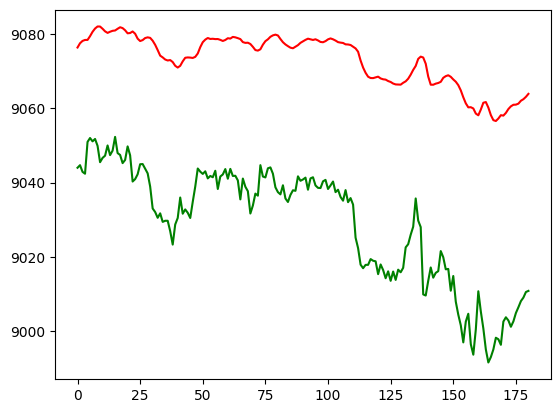

In [39]:
plt.plot(time, y_val_close, color='green') # true
plt.plot(time, predictions_close, color='red') # model
plt.show()

#Validation on a single example.

In [40]:
# Generate predictions for all validation data
pred = model.forward(X_val)
inverse_transform(pred.detach().numpy(), scaler)
X_val.size()
X_test = (X_val[0].unsqueeze(0))
X_test.size()
pred_test = model.forward(X_test)
pred_test # Prediction for the single example
stocks_101 = inverse_transform(pred_test.detach().numpy(), scaler)
stocks_101.tolist()  #['open', 'high', 'low', 'close', 'volume']

[[9054.806640625, 9058.6875, 9062.0166015625, 9076.33203125, 6317531.0]]